In [25]:
import NeuroFlow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv('train.csv')


In [30]:
def oneHot(n):
    array = np.zeros((10))
    array[n] = 1
    return array

def notOneHot(l):
    return np.argmax(l,axis=0)

y = []
for i in data['label']:
    y.append(oneHot(i))

datay = np.array(y)
datay

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [31]:
data.pop('label')
datax = np.array(data)
datax.shape


(42000, 784)

In [32]:
datax = datax/255.0


In [35]:
trainLen = int(len(datax)*0.8)
trainx = datax[:trainLen]
trainy = datay[:trainLen]
testx = datax[trainLen:]
testy = datay[trainLen:]
testx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
model = NeuroFlow.Sequential(784,10,outputLayerActivation='softmax')

model.addLayer(256)

model.addLayer(16)


In [10]:
history = model.fit(trainx,trainy,epochs=2000,learningRate=0.02,verboseInterval=50)


Epoch: 0
|====================|   Loss: 5.354882789336864

Epoch: 50
|====================|   Loss: 1.8270644036910297

Epoch: 100
|====================|   Loss: 1.257696662947758

Epoch: 150
|====================|   Loss: 1.0132228998727932

Epoch: 200
|====================|   Loss: 0.8735547099786655

Epoch: 250
|====================|   Loss: 0.7807537561230247

Epoch: 300
|====================|   Loss: 0.7148619898945854

Epoch: 350
|====================|   Loss: 0.6657157015958874

Epoch: 400
|====================|   Loss: 0.6273176790704025

Epoch: 450
|====================|   Loss: 0.596011993393

Epoch: 500
|====================|   Loss: 0.5697803708087847

Epoch: 550
|====================|   Loss: 0.5474442983802766

Epoch: 600
|====================|   Loss: 0.5279340054107815

Epoch: 650
|====================|   Loss: 0.5106425309425493

Epoch: 700
|====================|   Loss: 0.49501630736211666

Epoch: 750
|====================|   Loss: 0.48085177870896106

Epoch: 800
|==

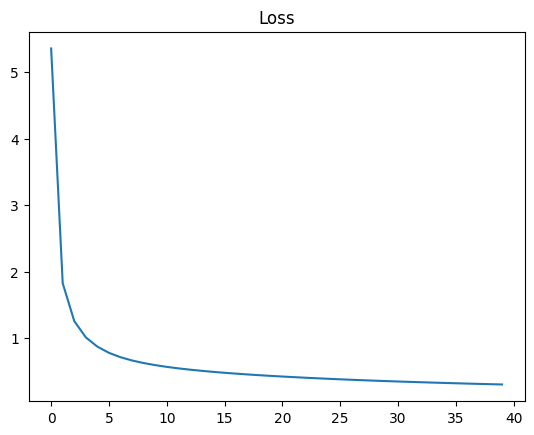

In [11]:
plt.plot(history)
plt.title('Loss')
plt.show()

In [12]:
model.save('models/mnist1.file')

[[6.55450276e-06 2.06165537e-05 3.58611349e-02 9.63710257e-01
  3.30645002e-08 5.18327847e-05 2.14050309e-04 3.77023316e-11
  1.35518754e-04 2.38895372e-09]]


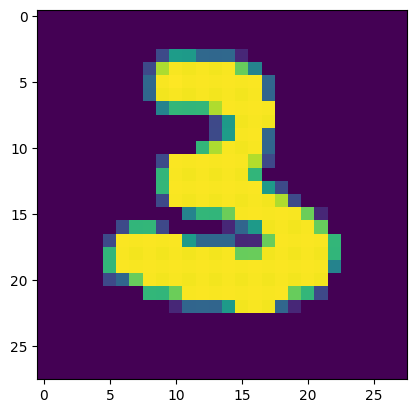

In [15]:

n = 10

plt.imshow(testx[n].reshape(28,28))
predict = model.predict(testx[n].reshape(1,784))
print(predict)


In [38]:
model.predict(testx[0].reshape(1,784))

array([[9.92807690e-01, 2.00295298e-08, 9.28735602e-07, 6.84391029e-07,
        5.43036970e-09, 5.25556607e-05, 7.11501615e-03, 5.72235403e-07,
        1.03410594e-05, 1.21860161e-05]])

In [40]:
correct = 0

for i in range(len(testx)):
    pred = model.predict(testx[i].reshape(1,784))
    p = notOneHot(pred[0])
    a = notOneHot(testy[i])


    if p == a:
        correct+=1

print("Accuracy:",correct/len(testx))



Accuracy: 0.9352380952380952
